The selected dataset for this data visualisation task is the 'penguins-size.csv' dataset.

In [1]:
# Importing the required modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [2]:
# Import penguins-size csv file dataset and display sample data
penguins_size = pd.read_csv('penguins_size.csv')
penguins_size.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
# Data Exploration
penguins_size.size

# Check Data Types
penguins_size.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [4]:
# Check other important dataframe information
penguins_size.info()
penguins_size.describe()
unique_fields = penguins_size.columns
print(unique_fields)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


In [5]:
# Missing data exploration
missing_data = penguins_size.isnull().sum()
print(missing_data)

# Print out rows with missing data
missing_peng_rows = penguins_size[penguins_size.isnull().any(axis=1)]
print(missing_peng_rows)

# Check for unique missing content
penguins_size['sex'].unique()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64
    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen               NaN              NaN                NaN   
8    Adelie  Torgersen              34.1             18.1              193.0   
9    Adelie  Torgersen              42.0             20.2              190.0   
10   Adelie  Torgersen              37.8             17.1              186.0   
11   Adelie  Torgersen              37.8             17.3              180.0   
47   Adelie      Dream              37.5             18.9              179.0   
246  Gentoo     Biscoe              44.5             14.3              216.0   
286  Gentoo     Biscoe              46.2             14.4              214.0   
324  Gentoo     Biscoe              47.3             13.8              216.0   
339  Gentoo     Bis

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [6]:
# Check for duplicated rows
dupe_rows = penguins_size.duplicated().sum()
print(dupe_rows)

0


In [9]:
# Replace missing numerical values with medians for specific species
# and missing categorical values with 'Other' for Adelie and Gentoo species
# Adelie Species
adelie_cl_median = penguins_size[penguins_size['species'] == 'Adelie']['culmen_length_mm'].median()
adelie_cd_median = penguins_size[penguins_size['species'] == 'Adelie']['culmen_depth_mm'].median()
adelie_flip_median = penguins_size[penguins_size['species'] == 'Adelie']['flipper_length_mm'].median()
adelie_bm_median = penguins_size[penguins_size['species'] == 'Adelie']['body_mass_g'].median()

# Checking Mode for Adelie Penguins
# adelie_sex_mode = penguins_size[penguins_size['species'] == 'Adelie']['sex'].mode()
# print(adelie_sex_mode)
# adelie_sex_count = penguins_size.groupby(['species','sex']).size()
# print(adelie_sex_count)

penguins_size.loc[penguins_size['species'] == 'Adelie', 'culmen_length_mm'] = penguins_size.loc[penguins_size['species'] == 'Adelie', 'culmen_length_mm'].fillna(adelie_cl_median)
penguins_size.loc[penguins_size['species'] == 'Adelie', 'culmen_depth_mm'] = penguins_size.loc[penguins_size['species'] == 'Adelie', 'culmen_depth_mm'].fillna(adelie_cd_median)
penguins_size.loc[penguins_size['species'] == 'Adelie', 'flipper_length_mm'] = penguins_size.loc[penguins_size['species'] == 'Adelie', 'flipper_length_mm'].fillna(adelie_flip_median)
penguins_size.loc[penguins_size['species'] == 'Adelie', 'body_mass_g'] = penguins_size.loc[penguins_size['species'] == 'Adelie', 'body_mass_g'].fillna(adelie_bm_median)
# penguins_size.loc[penguins_size['species'] == 'Adelie', 'sex'] = penguins_size.loc[penguins_size['species'] == 'Adelie', 'sex'].fillna('UNKNOWN')

# Gentoo Species
gentoo_cl_median = penguins_size[penguins_size['species'] == 'Gentoo']['culmen_length_mm'].median()
gentoo_cd_median = penguins_size[penguins_size['species'] == 'Gentoo']['culmen_depth_mm'].median()
gentoo_flip_median = penguins_size[penguins_size['species'] == 'Gentoo']['flipper_length_mm'].median()
gentoo_bm_median = penguins_size[penguins_size['species'] == 'Gentoo']['body_mass_g'].median()


penguins_size.loc[penguins_size['species'] == 'Gentoo', 'culmen_length_mm'] = penguins_size.loc[penguins_size['species'] == 'Gentoo', 'culmen_length_mm'].fillna(gentoo_cl_median)
penguins_size.loc[penguins_size['species'] == 'Gentoo', 'culmen_depth_mm'] = penguins_size.loc[penguins_size['species'] == 'Gentoo', 'culmen_depth_mm'].fillna(gentoo_cd_median)
penguins_size.loc[penguins_size['species'] == 'Gentoo', 'flipper_length_mm'] = penguins_size.loc[penguins_size['species'] == 'Gentoo', 'flipper_length_mm'].fillna(gentoo_flip_median)
penguins_size.loc[penguins_size['species'] == 'Gentoo', 'body_mass_g'] = penguins_size.loc[penguins_size['species'] == 'Gentoo', 'body_mass_g'].fillna(gentoo_bm_median)
# penguins_size.loc[penguins_size['species'] == 'Gentoo', 'sex'] = penguins_size.loc[penguins_size['species'] == 'Gentoo', 'sex'].fillna('UNKNOWN')

penguins_size = penguins_size.replace(to_replace='.', value=np.nan)
penguins_size = penguins_size.dropna()


In [10]:
# Recheck for missing data entries
missing_data_recheck = penguins_size.isnull().sum()
print(missing_data_recheck)

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [11]:
# Box Plots
# I used https://plotly.com/python/box-plots/ to understand how
# to use the plotly library to create the below figures using
# their examples

# Box Plot -Culmen Length
fig = px.box(penguins_size, x='species', y='culmen_length_mm', color='species', points='all')
fig.show()


From the above box plot of culmen length, which pertains to the upper length of the beak from the beak base to the tip of the jaw in millimeters, highlights that the Chinstrap and Gentoo species are fairly equal in regard to this feature with the Chinstrap have a higher median of ~49.6mm as compared to that of the Gentoo at ~47.3mm. Both of these exceeding the Adelie species with a median of approximately ~38.8mm. It is worth noting that there is an outlier on the Gentoo box plot of 59.6mm whereby this is either a measurement error or a subject with a longer culmen due to age. 

In [12]:
# Box Plot -Culmen Depth
fig = px.box(penguins_size, x='species', y='culmen_depth_mm', color='species', points='all')
fig.show()

From the above plot of culmen depth, corresponding to the width of the beak, both the Adelie and Chinstrap species have roughly the same dimension with more of a dispersion on the Adelie samples and most likely due to the fact that Adelie samples were taken from all three islands unlike the other two species with unique habitats, diets and possible genetic pools. 

The Gentoo species has the smallest bill depth of the three species, with a tight data dispersion like the Chinstrap population, again most likely due to the penguins originating from the same island population and not dispersed communities like the Adelie. 

In [21]:
# Box Plot - Flipper Length
fig = px.box(penguins_size, x='species', y='flipper_length_mm', color='species', points='all')
fig.show()
mean_flipper_lengths = penguins_size.groupby('species')['flipper_length_mm'].mean()
print(mean_flipper_lengths)

species
Adelie       190.102740
Chinstrap    195.823529
Gentoo       217.235294
Name: flipper_length_mm, dtype: float64


With respect to the above box plot, the Adelie species has a lower mean flipper length than that of the Chinstrap, although there are high and low outliers on the Adelie population most likely again due to the three different colonies inspected. The Gentoo species has the largest flipper lengths due to its larger size, as evident by the box plot below. 

In [18]:
# Box Plot - Body Mass
fig = px.box(penguins_size, x='species', y='body_mass_g', color='species', points='all')
fig.show()

Both the Adelie and Chinstrap are the lighter of the two species, with a much wider variation in body mass measurements on the Adelie species again most likely due to different diets, habitat and genetic conditions associated with the three different island populations. There is however a single outlier on the Chinstrap samples that is either a measurement error or a much younger penguin than the rest of the population. The Gentoo species is the heaviest of the three species, with the widest dispersion of data that is surprising, given that these penguins were observed on the same island and most likely from the same colony. Perhaps the age gaps here were most substantial than those of the other species, this will need to be investigated. 

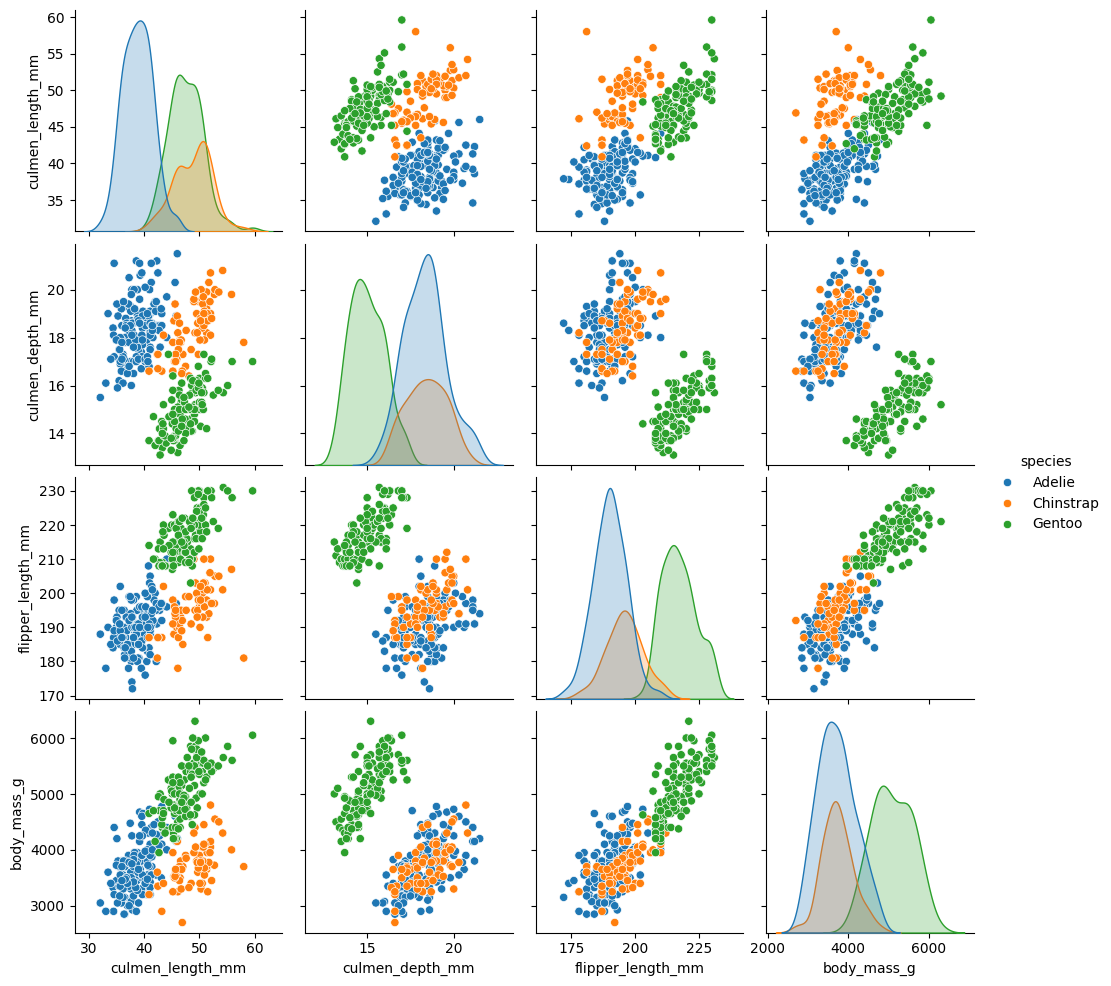

In [13]:
# Pairplot of numerical data for different species
sns.pairplot(data=penguins_size, hue='species')
plt.show()

The above pairplot highlights some interesting chacterstics, most notably correlations between variables which is numerically determined and displayed in the correlation plots below.
* One of the most notable is how both Adelie and Chinstrap penguins have fairly strong positively correlated body masses and culem depths but this is not the case for Gentoo species. 
* Flipper length and body mass are equally positively correlated across the three species. 

<Figure size 640x480 with 0 Axes>

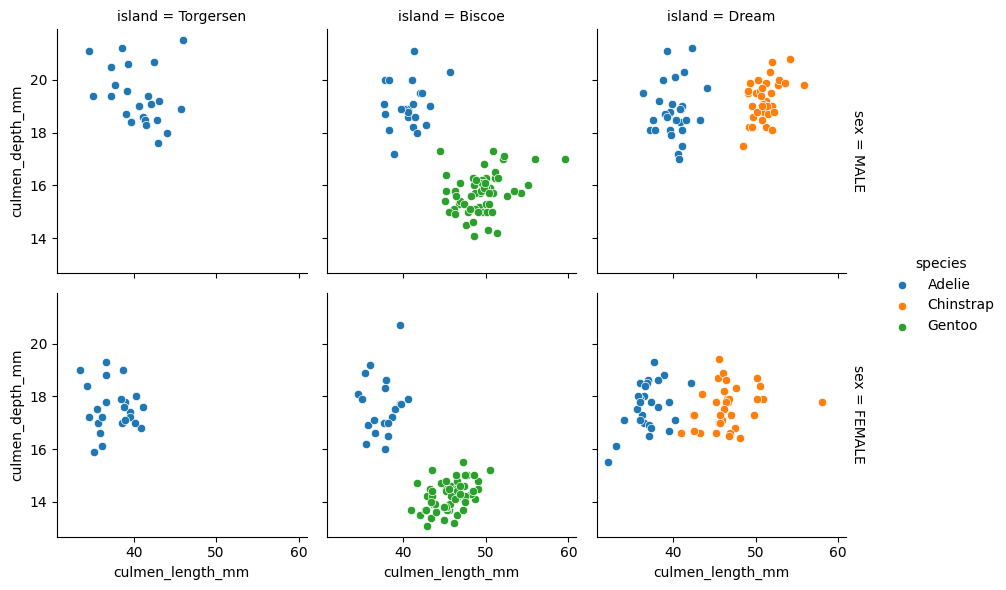

In [14]:
# Features based on Sex for Each Species
# Plot FacetGrid for Culmen Length and Depth
plt.figure()
fg = sns.FacetGrid(penguins_size, row='sex', col='island', hue='species', margin_titles=True)
fg.map(sns.scatterplot, 'culmen_length_mm', 'culmen_depth_mm')
fg.add_legend()
plt.show()
plt.close()

<Figure size 640x480 with 0 Axes>

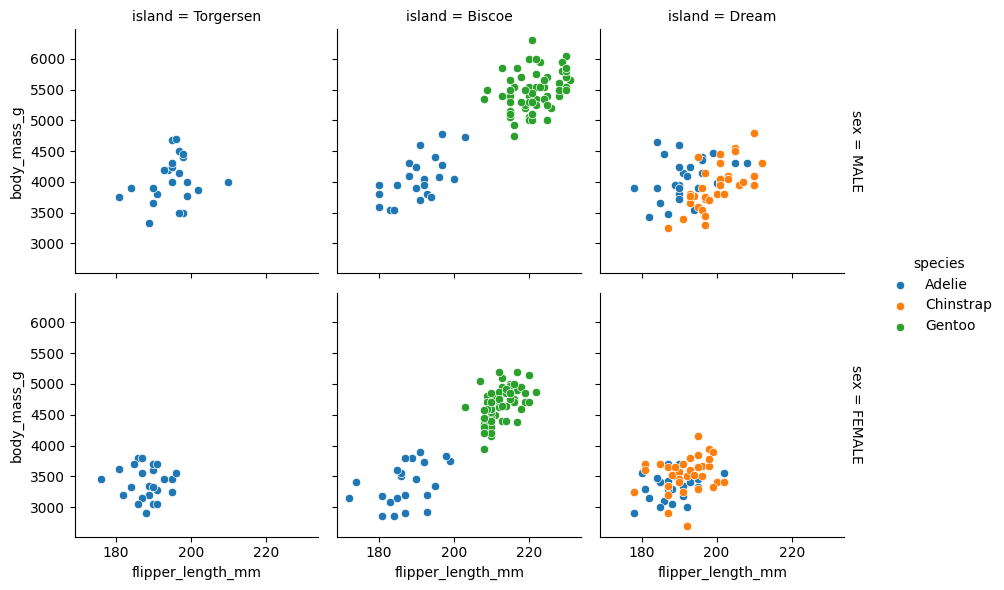

In [16]:
# Plot FacetGrid for Flipper Length and Body Mass
plt.figure()
fg = sns.FacetGrid(penguins_size, row='sex', col='island', hue='species', margin_titles=True)
fg.map(sns.scatterplot, 'flipper_length_mm', 'body_mass_g')
fg.add_legend()
plt.show()
plt.close()

In [24]:
adelie_cd_mean = penguins_size[penguins_size['species'] == 'Adelie']['culmen_depth_mm'].mean()
chinstrap_cd_mean = penguins_size[penguins_size['species'] == 'Chinstrap']['culmen_depth_mm'].mean()
gentoo_cd_mean = penguins_size[penguins_size['species'] == 'Gentoo']['culmen_depth_mm'].mean()
print(adelie_cd_mean,chinstrap_cd_mean, gentoo_cd_mean)

gentoo_cl_male_mean = penguins_size[(penguins_size['species'] == 'Gentoo') & (penguins_size['sex'] == 'MALE')]['culmen_length_mm'].mean()
gentoo_cl_female_mean = penguins_size[(penguins_size['species'] == 'Gentoo') & (penguins_size['sex'] == 'FEMALE')]['culmen_length_mm'].mean()
print(gentoo_cl_male_mean, gentoo_cl_female_mean)

gentoo_bm_male_mean = penguins_size[(penguins_size['species'] == 'Gentoo') & (penguins_size['sex'] == 'MALE')]['body_mass_g'].mean()
gentoo_bm_female_mean = penguins_size[(penguins_size['species'] == 'Gentoo') & (penguins_size['sex'] == 'FEMALE')]['body_mass_g'].mean()
gentoo_fl_male_mean = penguins_size[(penguins_size['species'] == 'Gentoo') & (penguins_size['sex'] == 'MALE')]['flipper_length_mm'].mean()
gentoo_fl_female_mean = penguins_size[(penguins_size['species'] == 'Gentoo') & (penguins_size['sex'] == 'FEMALE')]['flipper_length_mm'].mean() 

perc_diff_mass = ((gentoo_bm_male_mean-gentoo_bm_female_mean)/gentoo_bm_female_mean)*100
perc_diff_fl = ((gentoo_fl_male_mean-gentoo_fl_female_mean)/gentoo_fl_female_mean)*100

print(gentoo_bm_male_mean, gentoo_bm_female_mean, perc_diff_mass)
print(gentoo_fl_male_mean, gentoo_fl_female_mean, perc_diff_fl)

18.3472602739726 18.42058823529412 14.996638655462187
49.47377049180328 45.563793103448276
5484.836065573771 4679.741379310345 17.20382860947911
221.54098360655738 212.70689655172413 4.153173779527668


The two above charts split the different penguin species up, against their home island and sex and a number of interesting relationships can be deduced.
* Adelie and Chinstrap penguins have the widest culmen depths, compared to Gentoo penguins with averages of 18mm for the first two and 15mm for the latter for both sexes combined. 
* Males of the three species have both larger and wider culmen lengths and widths respectively, as exhibited clearly with the Gentoo species whereby males have an average culmen length of 49mm, versus that of females of 46mm. 
* Gentoo penguins have the largest body mass and longest flippers of the three species, whereby male Gentoo body masses are on average 17.2% heavier than their female counterparts, while there is only a 4.2% difference between male and female Gentoo flipper lengths. 

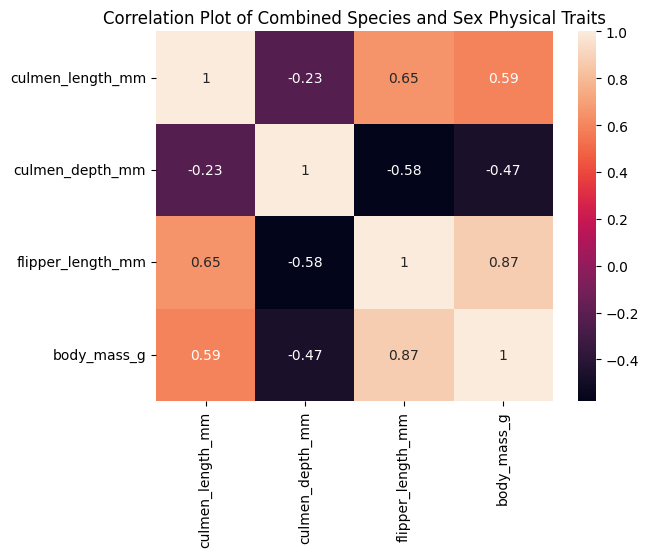

In [34]:
# Correlation Matrix

# Selection of columns of interest
penguin_numerics = penguins_size[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Plot Correlation Matrix - Combined Sexes
plt.figure()
corr_mat_peng = penguin_numerics.corr()
sns.heatmap(corr_mat_peng, annot=True)
plt.title('Correlation Plot of Combined Species and Sex Physical Traits')
plt.show()
plt.close()

With reference to the above correlation plot, there are numerous interesting points that can be deduced from the data.
* There is a high positive correlation (0.87) between flipper length and body mass as expected, as larger penguins need longer flippers in order to sufficiently displace a large enough volume of water in order to be effective underwater. 
* There are moderate positive correlations (0.59 and 0.65) between body mass and culmen length and flipper length and culmen length respectively, which again is intuitive as larger birds would expectedly have larger features, particularly those associated directly or indirectly with feeding to maintain their higher food intakes over smaller sized specimens. 
* There are moderate negative correlations (-0.59 and -0.47) between flipper length and culmen depth and body mass and culmen depth respectively. Larger birds owing to larger body mass and flipper lengths, seem to have smaller or narrower beaks most likely owing to body structure efficiency as they can use their overall size as a determining factor when hunting prey as opposed to physical features used to catch prey.
* There is a weak negative correlation between culmen depth and culmen length, whereby the proportions of the beak are more heavily influenced by the size of the penguin. 

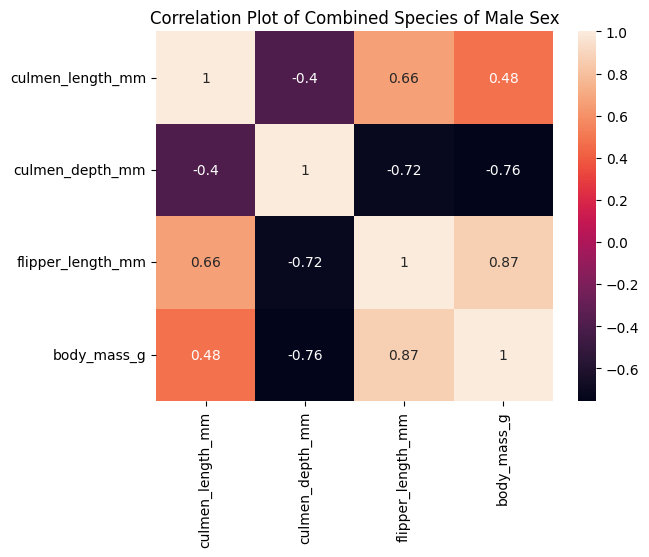

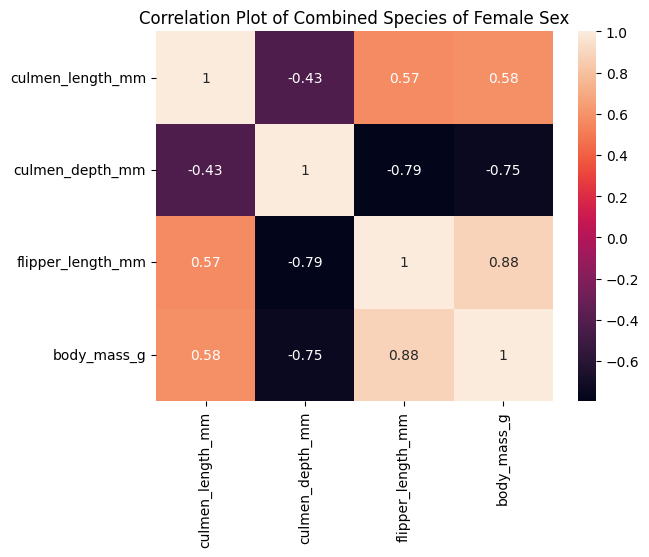

In [35]:
# Correlation Matrix #2

# Selection of columns of interest
male_pengs = penguins_size[penguins_size['sex'] == 'MALE']
female_pengs = penguins_size[penguins_size['sex'] == 'FEMALE']

penguin_numerics_male = male_pengs[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
penguin_numerics_female = female_pengs[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Plot Correlation Matrix - Male
plt.figure()
corr_mat_peng_male = penguin_numerics_male.corr()
sns.heatmap(corr_mat_peng_male, annot=True)
plt.title('Correlation Plot of Combined Species of Male Sex')
plt.show()
plt.close()

# Plot Correlation Matrix - Female
plt.figure()
corr_mat_peng_female = penguin_numerics_female.corr()
sns.heatmap(corr_mat_peng_female, annot=True)
plt.title('Correlation Plot of Combined Species of Female Sex')
plt.show()
plt.close()

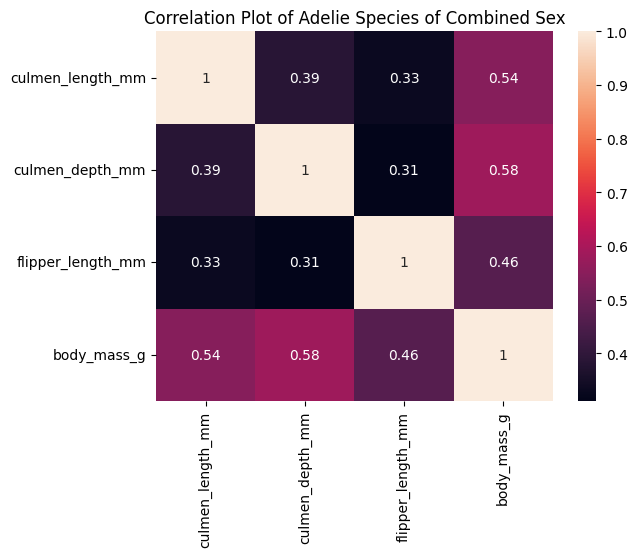

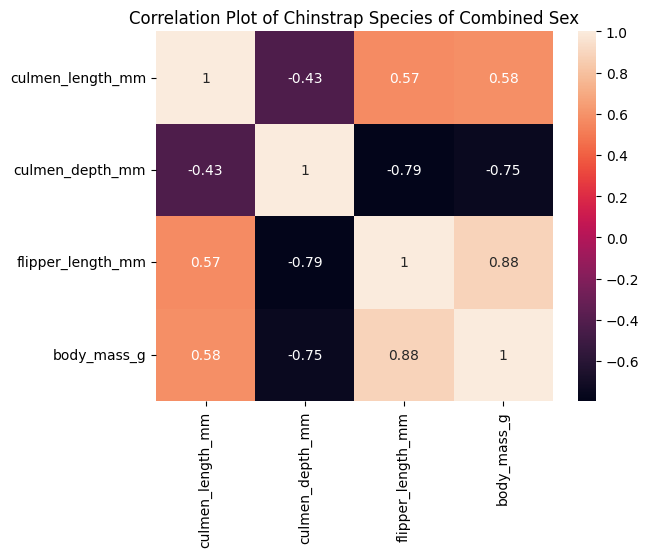

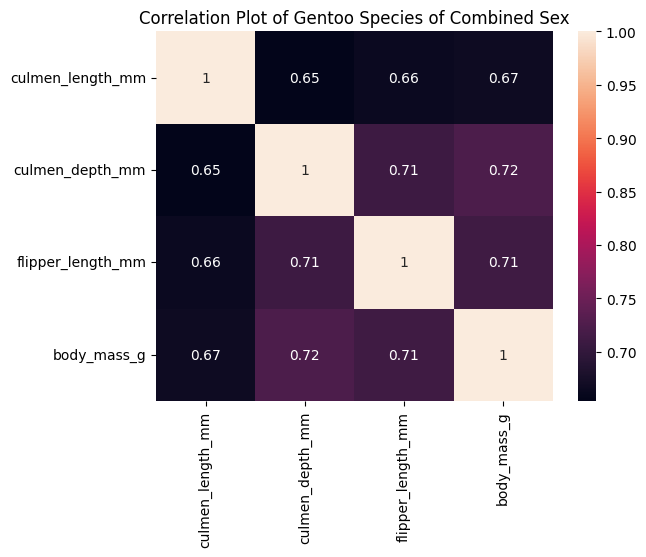

In [37]:
# Selection of columns of interest
adelie_pengs = penguins_size[penguins_size['species'] == 'Adelie']
chinstrap_pengs = penguins_size[penguins_size['species'] == 'Chinstrap']
gentoo_pengs = penguins_size[penguins_size['species'] == 'Gentoo']

penguin_numerics_adelie = adelie_pengs[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
penguin_numerics_chinstrap = chinstrap_pengs[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
penguin_numerics_gentoo = gentoo_pengs[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Plot Correlation Matrix - Adelie
plt.figure()
corr_mat_peng_adelie = penguin_numerics_adelie.corr()
sns.heatmap(corr_mat_peng_adelie, annot=True)
plt.title('Correlation Plot of Adelie Species of Combined Sex')
plt.show()
plt.close()

# Plot Correlation Matrix - Chinstrap
plt.figure()
corr_mat_peng_chinstrap = penguin_numerics_chinstrap.corr()
sns.heatmap(corr_mat_peng_female, annot=True)
plt.title('Correlation Plot of Chinstrap Species of Combined Sex')
plt.show()
plt.close()

# Plot Correlation Matrix - Gentoo
plt.figure()
corr_mat_peng_gentoo = penguin_numerics_gentoo.corr()
sns.heatmap(corr_mat_peng_gentoo, annot=True)
plt.title('Correlation Plot of Gentoo Species of Combined Sex')
plt.show()
plt.close()

While separate corrolation plots for combined species but different sexes does not provide much different insight to the combined plot shown previously, separate correlation plots for the different species does show some interesting facts.
* Although all species show postive correlation bewteen the features of body mass and flipper length, this relationship is particuarly dominant in the Chinstrap (0.88) and Gentoo (0.77) species. 
* As was highlighted in the pairplot above but more clearly shown in the correlation plots directly above is the fact that culmen depth and body mass are positively correlated for both Gentoo and Adelie species (and on the combined species correlation plot) but this is not the case for the Chinstrap species which has a fairly strong negative correlation for these two features. 
* Culmen depth and length are positively correlated for both the Gentoo and Adelie species but not for the Chinstrap species and interesting, not for the combined plot.
* Culmen depth and flipper length are also only positively correlated for the Adelie and Gentoo species but negatively correlated for the Chinstrap species.  

<Axes: xlabel='count', ylabel='species'>

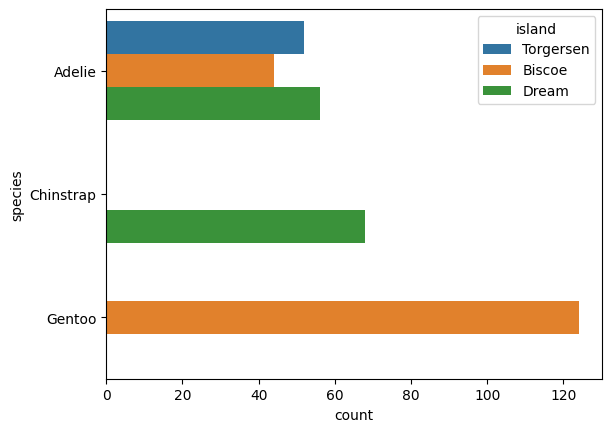

In [53]:
# Countplot for Species and Island 
sns.countplot(y='species', hue='island', data=penguins_size, )

The above count plot highlights the three island locations in the Antartic in which the penguins were located and measured for the study. 
The majority of the penguin subjects were native to the Biscoe island as evident by the Gentoo and Adelie species, followed by Dream island being the home for the Chinstrap and Adelie species and finally Togersen, the exclusive home for the Adelie species.

This indicates that these three islands most likely have varying characteristics or prevalent food sources and why not all three species were found on one single island. 